# Calculating Upper Limits for Non Detections

In [37]:
from __future__ import print_function, absolute_import, division, unicode_literals
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import astropy.units as u
from linetools.spectralline import AbsLine
from linetools.spectra import io as lsio
from linetools.isgm.abscomponent import AbsComponent
from linetools.spectra.xspectrum1d import XSpectrum1D
from linetools.lists.linelist import LineList

import glob
from astropy import constants as const


""" Utlities for the analysis of absorption lines
"""
import pdb
import warnings
from astropy.io import ascii
from astropy.utils import isiterable

## Import modules

from linetools.spectra import io as lsio
from linetools.spectra.xspectrum1d import XSpectrum1D
from linetools.spectralline import AbsLine, SpectralLine

import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import constants as const
import astropy.units as u

#plotting things 
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 14

# update various fontsizes to match
params = {'figure.figsize': (8, 6),
          'legend.fontsize': 11,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.6 * fs,
          'ytick.labelsize': 0.6 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)

In [74]:
#Bring in the data that needs upper limits calculated 

### CIV Non Detection 
all_vp_df_J1235 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J1235/all_vp.csv')

### SiIV Non Detection 
all_vp_df_J1101 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J1101/all_vp.csv')
all_vp_df_J1249 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J1249/all_vp.csv')
all_vp_df_J1123 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J1123/all_vp.csv')
all_vp_df_J0246 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J0246/all_vp.csv')
all_vp_df_J1235 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J1235/all_vp.csv')

#Archive Find 
all_vp_df_2E1058 = pd.read_csv('/Users/samgarza/Documents/Sam_COSHoles_Analysis/SamIDs_2E-1058_Oct2022/all_vp.csv')

In [4]:
## Define constants

c = const.c.to('km/s').value # Speed of light

# Function for reading in the spectrum

def get_spectrum(filename):
    flux_line = fits.getdata(filename, ext=0)
    flux_error = fits.getdata(filename, ext=1)
    wave_data = fits.getdata(filename, ext=2)
    flux_cont = fits.getdata(filename, ext=3)
    return wave_data, flux_line, flux_error, flux_cont

# Let's say we're interested in our sensitivity limit for the CIV 1548 A line

#CIV
line_wave_1548 = 1548.2040

# SiIV
line_wave_1393 = 1393.7602

In [75]:
# Load spectrum
ism = LineList('ISM')

#################################################

#J1101
specfile_J1101 = '/Users/samgarza/Dropbox/COS-HolesHSTdata/J1101+1429/J1101+1429_nbin3_jwnorm.fits' #normalized spectra file 
xspec_J1101 = lsio.readspec(specfile_J1101)

# Get wavelength, flux, flux error, and continuum flux for the spectrum
waves_J1101, flux_J1101, flux_err_J1101, cont_J1101 = get_spectrum(specfile_J1101)
# Calculate continuum-normalized flux
normflux_J1101, normflux_err_J1101 = flux_J1101/cont_J1101, flux_err_J1101/cont_J1101 

#################################################

#J1249
specfile_J1249 = '/Users/samgarza/Dropbox/COS-HolesHSTdata/J1249+4122/J1249+4122_nbin3_visit12_jwnorm.fits' #normalized spectra file 
xspec_J1249 = lsio.readspec(specfile_J1249)

# Get wavelength, flux, flux error, and continuum flux for the spectrum
waves_J1249, flux_J1249, flux_err_J1249, cont_J1249 = get_spectrum(specfile_J1249)
# Calculate continuum-normalized flux
normflux_J1249, normflux_err_J1249 = flux_J1249/cont_J1249, flux_err_J1249/cont_J1249 

#################################################

#J1123
specfile_J1123 = '/Users/samgarza/Dropbox/COS-HolesHSTdata/J1123+1257/J1123+1257_nbin3_BASIC_jwnorm.fits' #normalized spectra file 
xspec_J1123 = lsio.readspec(specfile_J1123)

# Get wavelength, flux, flux error, and continuum flux for the spectrum
waves_J1123, flux_J1123, flux_err_J1123, cont_J1123 = get_spectrum(specfile_J1123)
# Calculate continuum-normalized flux
normflux_J1123, normflux_err_J1123 = flux_J1123/cont_J1123, flux_err_J1123/cont_J1123 

#################################################

#J0246
specfile_J0246 = '/Users/samgarza/Dropbox/COS-HolesHSTdata/J0246-3007/J0246-3007_nbin3_allvisits_jwnorm.fits' #normalized spectra file 
xspec_J0246 = lsio.readspec(specfile_J0246)

# Get wavelength, flux, flux error, and continuum flux for the spectrum
waves_J0246, flux_J0246, flux_err_J0246, cont_J0246 = get_spectrum(specfile_J0246)
# Calculate continuum-normalized flux
normflux_J0246, normflux_err_J0246 = flux_J0246/cont_J0246, flux_err_J0246/cont_J0246 

#################################################

#J1235
specfile_J1235 = '/Users/samgarza/Dropbox/COS-HolesHSTdata/J1235+1123/J1235+1123_twovisits_m3_jwnorm.fits' #normalized spectra file 
xspec_J1235 = lsio.readspec(specfile_J1235)

# Get wavelength, flux, flux error, and continuum flux for the spectrum
waves_J1235, flux_J1235, flux_err_J1235, cont_J1235 = get_spectrum(specfile_J1235)
# Calculate continuum-normalized flux
normflux_J1235, normflux_err_J1235 = flux_J1235/cont_J1235, flux_err_J1235/cont_J1235

#################################################

#2E1058
specfile_2E = '/Users/samgarza/Dropbox/COS-HolesHSTdata/NewArchivalSample/2E1058+1102/2E1058+1102_nbin3_jwnorm.fits' #normalized spectra file 
xspec_2E = lsio.readspec(specfile_2E)

# Get wavelength, flux, flux error, and continuum flux for the spectrum
waves_2E, flux_2E, flux_err_2E, cont_2E = get_spectrum(specfile_2E)
# Calculate continuum-normalized flux
normflux_2E, normflux_err_2E = flux_2E/cont_2E, flux_err_2E/cont_2E

Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12


In [76]:
#Converts wavelengths to velocities 
def convert_wave2vel(obs_wave, rest_wave, LSR_vel=0.):
    # Define constants
    c = const.c.to('km/s').value #has the right value but no units 
    return (((obs_wave - rest_wave)/rest_wave) * c) - LSR_vel #calculates z then * c to makes velocity

LSR_values = np.array([676.9, 985.1, 307.8, 1469.8, 721, 1271.1, 1141.9, 10802.72])

#Will change line_wave between CIV and SiIV (only taking upper limits of the strong line)

### CIV 
vels_J1235_civ = convert_wave2vel(waves_J1235, line_wave_1548, LSR_vel=LSR_values[6])

### SiIV
vels_J1101 = convert_wave2vel(waves_J1101, line_wave_1393, LSR_vel=LSR_values[0])
vels_J1249 = convert_wave2vel(waves_J1249, line_wave_1393, LSR_vel=LSR_values[2])
vels_J1123 = convert_wave2vel(waves_J1123, line_wave_1393, LSR_vel=LSR_values[4])
vels_J0246 = convert_wave2vel(waves_J0246, line_wave_1393, LSR_vel=LSR_values[5])
vels_J1235_siiv = convert_wave2vel(waves_J1235, line_wave_1393, LSR_vel=LSR_values[6])

#Archive Find 
vels_2E = convert_wave2vel(waves_2E, line_wave_1393, LSR_vel=LSR_values[7])

## Sensitivity Limits Calculation

First, identify a featureless region of the spectrum near the line you are measuring. 

Then measure the column density of this noisy region (which theoretically should be 0), and the error on that column density measurement gives us the sensitivity limit.

In [79]:
# Choose the width of the velocity window you'll use to measure noise 
window_width = 100 # km/s

## Examine the spectrum by eye near the line of interest to find a featureless region where you want to measure noise

#################################################
###### CIV Non Detections ######
#################################################

# Choose where this measurement window is centered. 
    # Change this variable to move the window around and identify a region with pure noise and no absorption features

centervel_J1235_civ = 0 

# Save min and max velocity limits of the window
leftlim_J1235_civ = centervel_J1235_civ-window_width/2
rightlim_J1235_civ = centervel_J1235_civ+window_width/2

def J1235_civ():
    # Plot spectrum
    plt.step(vels_J1235_civ, normflux_J1235)
    plt.ylim(0,1.3)
    plt.xlim(-400,500)
    # Plot velocity window
    plt.axvspan(leftlim_J1235_civ,rightlim_J1235_civ,alpha = 0.3,color='g')
    plt.xlabel('Relative Velocity [km/s]')
    plt.title('CIV J1235 Uplim Measurement Window')
    plt.show()
    
#################################################
###### SiIV Non Detections ######
#################################################

# Choose where this measurement window is centered. 
    # Change this variable to move the window around and identify a region with pure noise and no absorption features

centervel_J1101 = 0 

# Save min and max velocity limits of the window
leftlim_J1101 = centervel_J1101-window_width/2
rightlim_J1101 = centervel_J1101+window_width/2

def J1101():
    # Plot spectrum
    plt.step(vels_J1101, normflux_J1101)
    plt.ylim(0,1.3)
    plt.xlim(-400,500)
    # Plot velocity window
    plt.axvspan(leftlim_J1101,rightlim_J1101,alpha = 0.3,color='g')
    plt.xlabel('Relative Velocity [km/s]')
    plt.title('SiIV J1101 Uplim Measurement Window')
    plt.show()
    
#################################################

# Choose where this measurement window is centered. 
    # Change this variable to move the window around and identify a region with pure noise and no absorption features

centervel_J1249 = 0 

# Save min and max velocity limits of the window
leftlim_J1249 = centervel_J1249-window_width/2
rightlim_J1249 = centervel_J1249+window_width/2

def J1249():
    # Plot spectrum
    plt.step(vels_J1249, normflux_J1249)
    plt.ylim(0,1.3)
    plt.xlim(-400,500)
    # Plot velocity window
    plt.axvspan(leftlim_J1249,rightlim_J1249,alpha = 0.3,color='g')
    plt.xlabel('Relative Velocity [km/s]')
    plt.title('SiIV J1249 Uplim Measurement Window')
    plt.show()
    
#################################################

# Choose where this measurement window is centered. 
    # Change this variable to move the window around and identify a region with pure noise and no absorption features

centervel_J1123 = 0 

# Save min and max velocity limits of the window
leftlim_J1123 = centervel_J1123-window_width/2
rightlim_J1123 = centervel_J1123+window_width/2

def J1123():
    # Plot spectrum
    plt.step(vels_J1123, normflux_J1123)
    plt.ylim(0,1.3)
    plt.xlim(-400,500)
    # Plot velocity window
    plt.axvspan(leftlim_J1123,rightlim_J1123,alpha = 0.3,color='g')
    plt.xlabel('Relative Velocity [km/s]')
    plt.title('SiIV J1123 Uplim Measurement Window')
    plt.show()
    
#################################################

# Choose where this measurement window is centered. 
    # Change this variable to move the window around and identify a region with pure noise and no absorption features

centervel_J0246 = -100 

# Save min and max velocity limits of the window
leftlim_J0246 = centervel_J0246-window_width/2
rightlim_J0246 = centervel_J0246+window_width/2

def J0246():
    # Plot spectrum
    plt.step(vels_J0246, normflux_J0246)
    plt.ylim(0,1.3)
    plt.xlim(-400,500)
    # Plot velocity window
    plt.axvspan(leftlim_J0246,rightlim_J0246,alpha = 0.3,color='g')
    plt.xlabel('Relative Velocity [km/s]')
    plt.title('SiIV J0246 Uplim Measurement Window')
    plt.show()
    
#################################################

# Choose where this measurement window is centered. 
    # Change this variable to move the window around and identify a region with pure noise and no absorption features

centervel_J1235_siiv = 0 

# Save min and max velocity limits of the window
leftlim_J1235_siiv = centervel_J1235_siiv-window_width/2
rightlim_J1235_siiv = centervel_J1235_siiv+window_width/2

def J1235_siiv():
    # Plot spectrum
    plt.step(vels_J1235_siiv, normflux_J1235)
    plt.ylim(0,1.3)
    plt.xlim(-400,500)
    # Plot velocity window
    plt.axvspan(leftlim_J1235_siiv,rightlim_J1235_siiv,alpha = 0.3,color='g')
    plt.xlabel('Relative Velocity [km/s]')
    plt.title('SiIV J1235 Uplim Measurement Window')
    plt.show()
    
#################################################

# Choose where this measurement window is centered. 
    # Change this variable to move the window around and identify a region with pure noise and no absorption features

centervel_2E = 0 

# Save min and max velocity limits of the window
leftlim_2E = centervel_2E-window_width/2
rightlim_2E = centervel_2E+window_width/2

def archive_2E():
    # Plot spectrum
    plt.step(vels_2E, normflux_2E)
    plt.ylim(0,1.3)
    plt.xlim(-400,500)
    # Plot velocity window
    plt.axvspan(leftlim_J1235_siiv,rightlim_J1235_siiv,alpha = 0.3,color='g')
    plt.xlabel('Relative Velocity [km/s]')
    plt.title('SiIV 2E-1058 Uplim Measurement Window')
    plt.show()

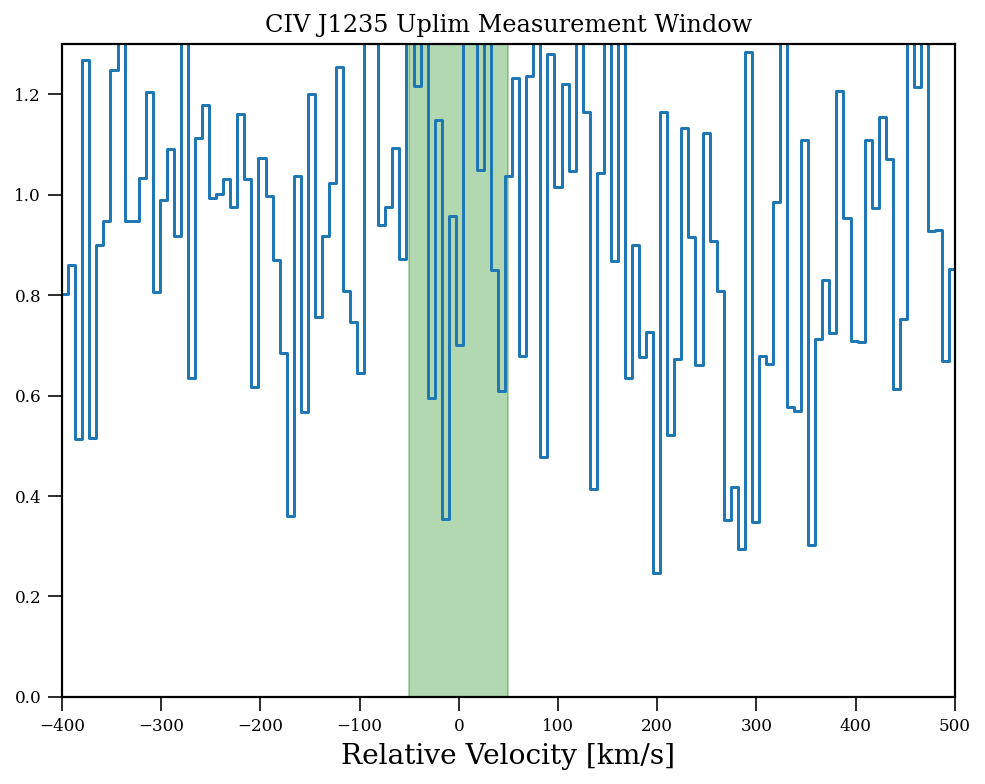

In [38]:
J1235_civ()

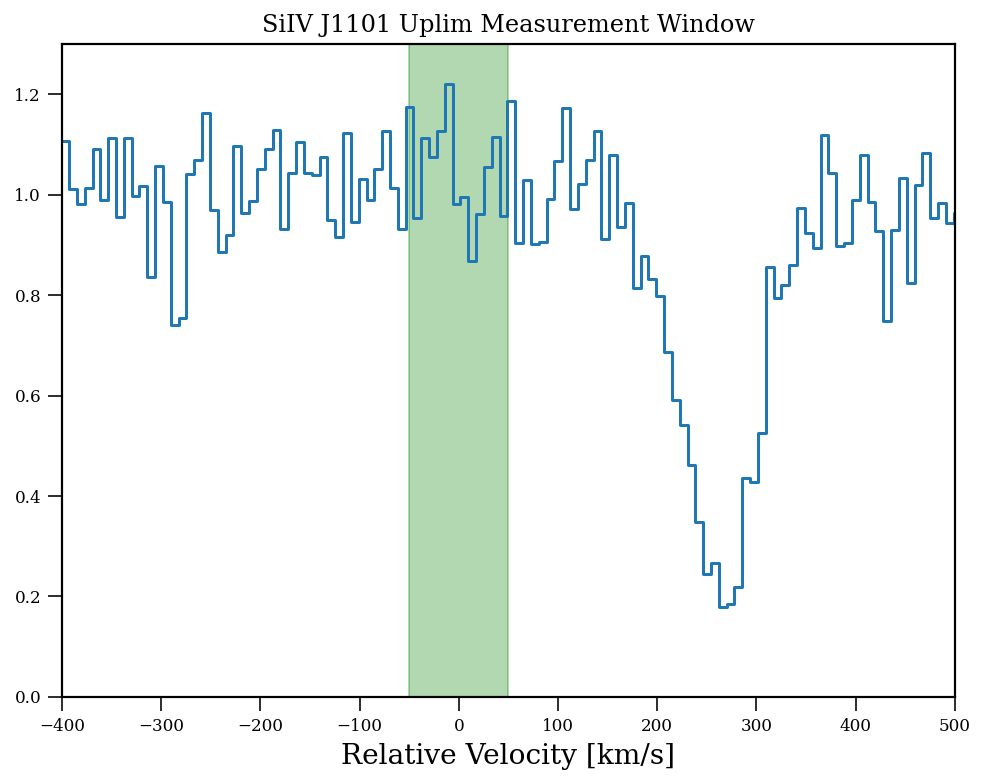

In [39]:
J1101()

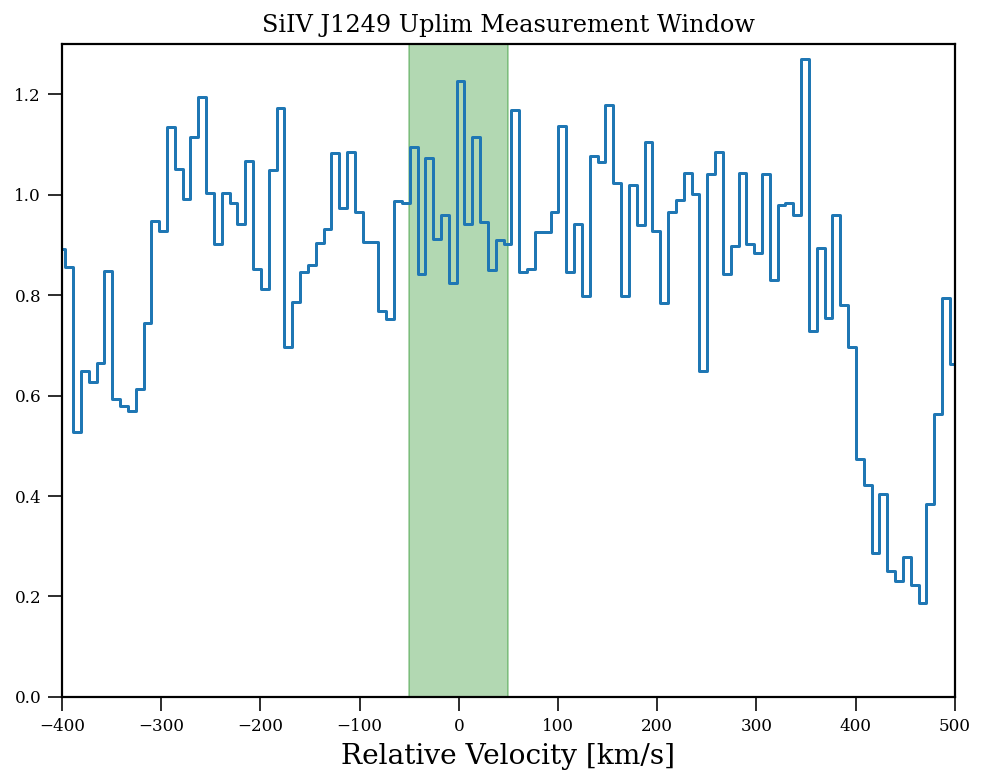

In [43]:
J1249()

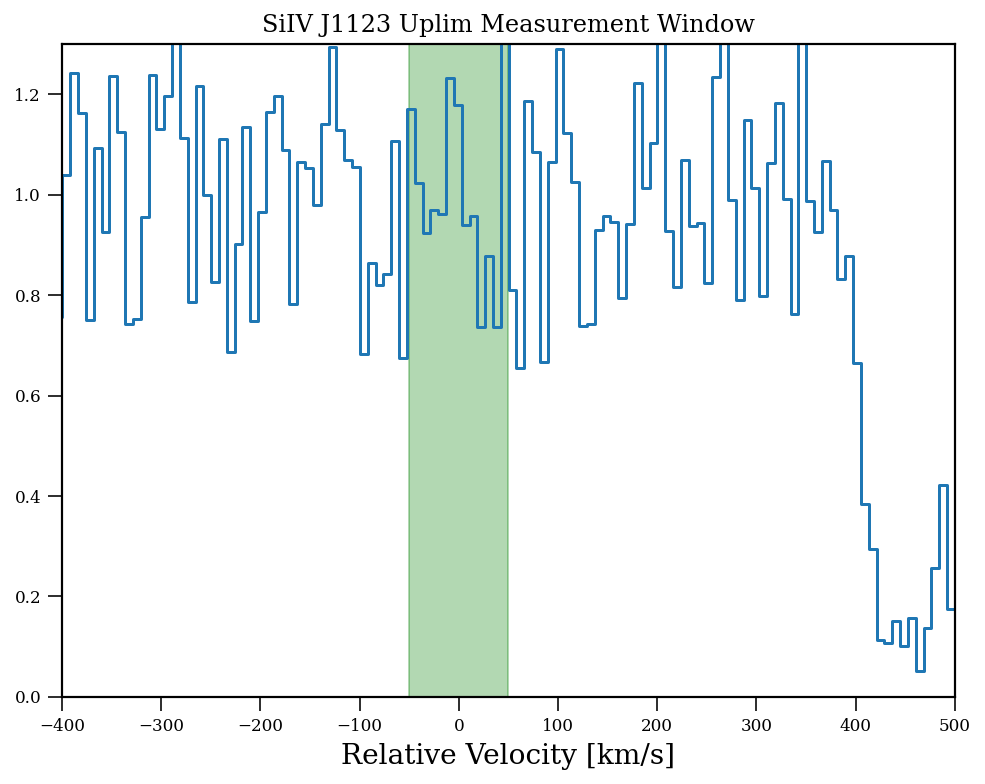

In [49]:
J1123()

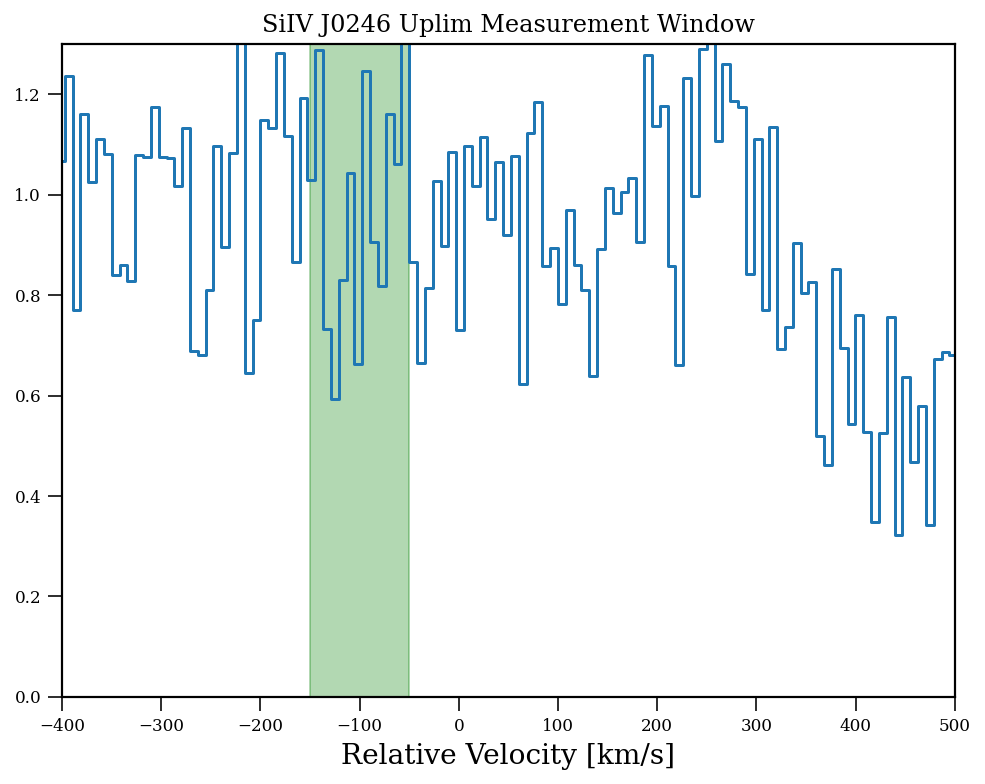

In [55]:
J0246()

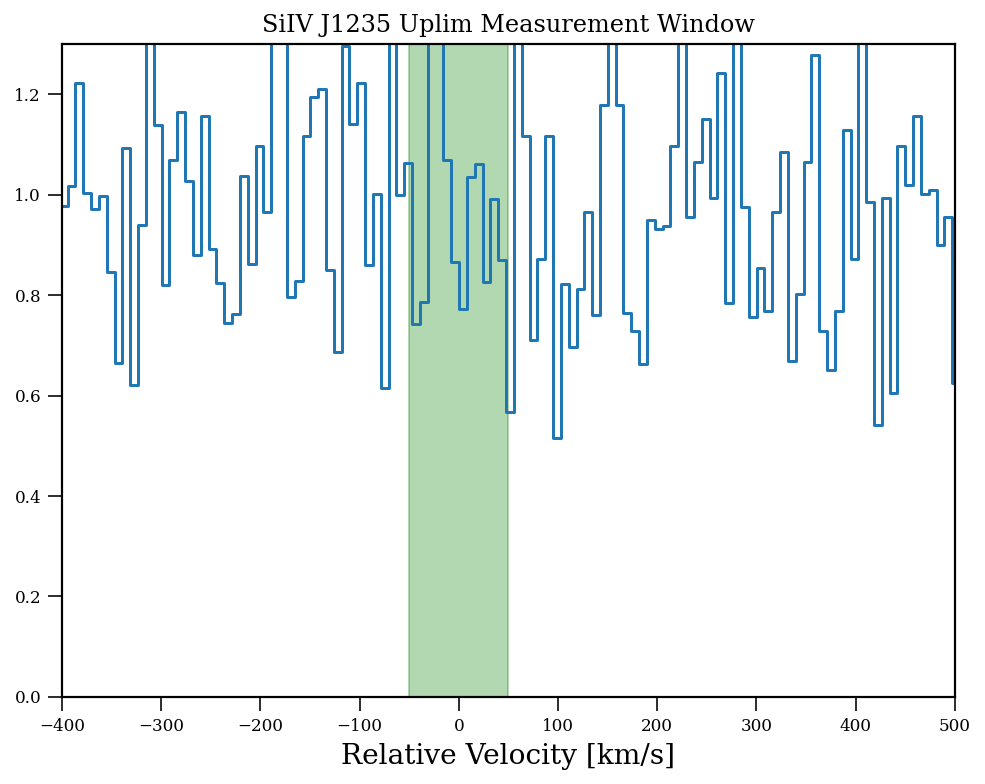

In [63]:
J1235_siiv()

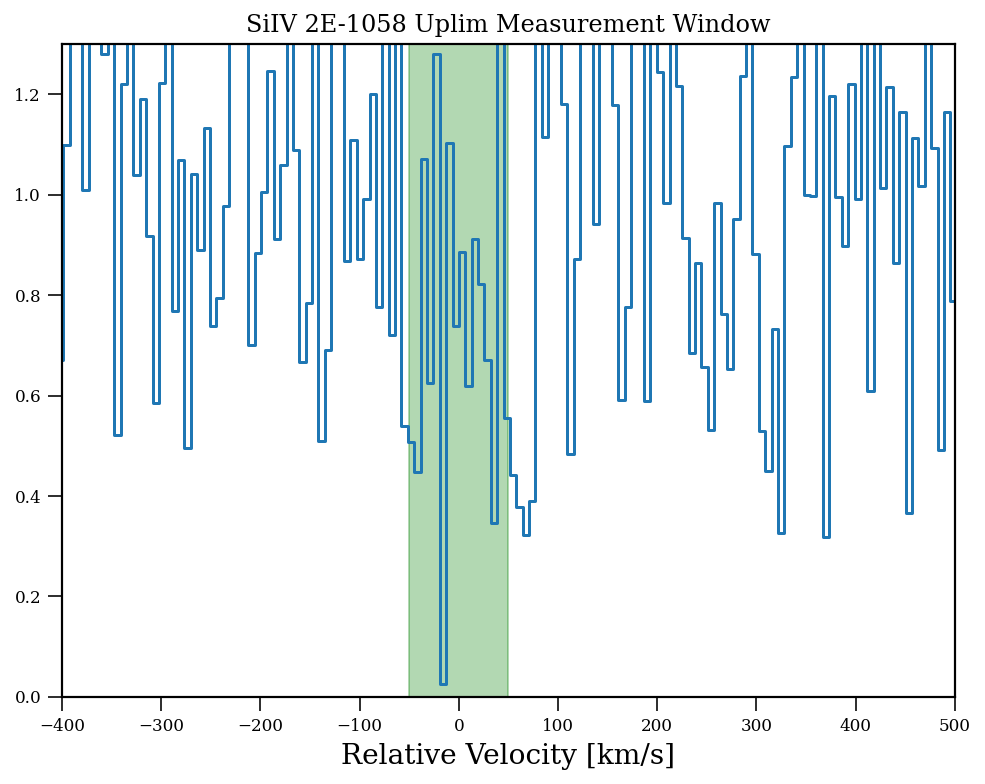

In [80]:
archive_2E()

In [21]:
def sensitivity_limits(abslin, waves, normflux, normflux_err, leftlim, rightlim): 
    abs_line = abslin
    abs_line.analy['spec'] = XSpectrum1D.from_tuple((waves, normflux, normflux_err))  # Set spectrum
    abs_line.limits.set([leftlim,rightlim]*u.km/u.s) # Set analysis range
    abs_line.measure_aodm() # Measure column density (observer frame)
    
    N = abs_line.attrib['N']         # Column density measurement for featureless region (not used)
    N_err = abs_line.attrib['sig_N'] # Column density 1-sigma error for featureless region
    
    return N_err

# Set absorption line
abslin_civ = AbsLine('CIV 1548')
abslin_siiv = AbsLine('SiIV 1393')

Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12


In [81]:
#Getting the upper limits for each of the non detections 

N_err_civ_J1235=sensitivity_limits(abslin_civ, waves_J1235, normflux_J1235, normflux_err_J1235, leftlim_J1235_civ, rightlim_J1235_civ)

N_err_J1101 = sensitivity_limits(abslin_siiv, waves_J1101, normflux_J1101, normflux_err_J1101, leftlim_J1101, rightlim_J1101)

N_err_J1249 = sensitivity_limits(abslin_siiv, waves_J1249, normflux_J1249, normflux_err_J1249, leftlim_J1249, rightlim_J1249)

N_err_J1123 = sensitivity_limits(abslin_siiv, waves_J1123, normflux_J1123, normflux_err_J1123, leftlim_J1123, rightlim_J1123)

N_err_J0246 = sensitivity_limits(abslin_siiv, waves_J0246, normflux_J0246, normflux_err_J0246, leftlim_J0246, rightlim_J0246)

N_err_siiv_J1235=sensitivity_limits(abslin_siiv, waves_J1235, normflux_J1235,normflux_err_J1235,leftlim_J1235_siiv,rightlim_J1235_siiv)

N_err_2E = sensitivity_limits(abslin_siiv, waves_2E, normflux_2E, normflux_err_2E, leftlim_2E, rightlim_2E)

/Users/samgarza/linetools/linetools/spectra/xspectrum1d.py:107: UserWarning: Assuming wavelength unit is Angstroms
  warnings.warn("Assuming wavelength unit is Angstroms")


The error on the column density for a region with no absorption gives the sensitivity limit, since any gas absorption at this column density or lower will be indistinguishable from noise

Note: error given is a 1-sigma error. If you want to report 2-sigma error you can simply multiply the column density error by 2

In [82]:
sigma = 2.

N_uplim_civ_J1235 = np.round(np.log10(np.abs(sigma * N_err_civ_J1235.value)),2)
print("CIV J1235 (2-sigma sensitivity limit): logN <", N_uplim_civ_J1235) # In cm^-2

N_uplim_J1101 = np.round(np.log10(np.abs(sigma * N_err_J1101.value)),2)
print("SiIV J1101 (2-sigma sensitivity limit): logN <", N_uplim_J1101) # In cm^-2

N_uplim_J1249 = np.round(np.log10(np.abs(sigma * N_err_J1249.value)),2)
print("SiIV J1249 (2-sigma sensitivity limit): logN <", N_uplim_J1249) # In cm^-2

N_uplim_J1123 = np.round(np.log10(np.abs(sigma * N_err_J1123.value)),2)
print("SiIV J1123 (2-sigma sensitivity limit): logN <", N_uplim_J1123) # In cm^-2

N_uplim_J0246 = np.round(np.log10(np.abs(sigma * N_err_J0246.value)),2)
print("SiIV J0246 (2-sigma sensitivity limit): logN <", N_uplim_J0246) # In cm^-2

N_uplim_siiv_J1235 = np.round(np.log10(np.abs(sigma * N_err_siiv_J1235.value)),2)
print("SiIV J1235 (2-sigma sensitivity limit): logN <", N_uplim_siiv_J1235) # In cm^-2

N_uplim_2E = np.round(np.log10(np.abs(sigma * N_err_2E.value)),2)
print("SiIV 2E-1058 (2-sigma sensitivity limit): logN <", N_uplim_2E) # In cm^-2

CIV J1235 (2-sigma sensitivity limit): logN < 13.36
SiIV J1101 (2-sigma sensitivity limit): logN < 12.54
SiIV J1249 (2-sigma sensitivity limit): logN < 12.69
SiIV J1123 (2-sigma sensitivity limit): logN < 12.83
SiIV J0246 (2-sigma sensitivity limit): logN < 13.2
SiIV J1235 (2-sigma sensitivity limit): logN < 12.75
SiIV 2E-1058 (2-sigma sensitivity limit): logN < 13.17


In [69]:
siiv_uplims = np.stack((N_uplim_J1101, N_uplim_J1249, N_uplim_J1123, N_uplim_J0246, N_uplim_siiv_J1235), axis = 0)
siiv_uplims

array([12.54, 12.69, 12.83, 13.2 , 12.75])

In [70]:
d = {'SiIV_Uplims': siiv_uplims}
df = pd.DataFrame(data=d)
df

,SiIV_Uplims
0,12.54
1,12.69
2,12.83
3,13.20
4,12.75


In [71]:
df.to_csv('SiIV_upper_limits.csv')